# Table of Contents
***

## Introduction to Linear Regression
- [Relationships](#relation)

- [What is Linear Regression? Why?](#Ensemble)
    
- [How it Works](#school_attendance)
    
- [Key Terminologies](#school_attendance)
    
- [Statistical Modeling vs Predictive Modeling](#hi)


## Odinary Least Squares and Model Parameters
- [Model Parameters](#mp)

- [Ordinary Least Squares](#ols)


## Finding Model Parameters
- [Normal Equation](#ne)
- [Gradient Descent](#gd)


## Interpreting OLS Regression Results
- [R Squared](#r2)

- [Adjusted R Squared](#r22)

- [Intercept and Coefficients](#coeff)

- [Null-Hypothesis and P-value](#p)


## Assumptions & How to Check
- [Detecting Heteroskedestacity - Residual Plot](#DV)

- [Detecting Multicollinearity - VIF](#mc)

- [Detecting Linearity](#hetero)

- [Normal Distribution of Residuals - QQ Plot](#nr)


## Modeling
- [Simple Linear Regresssion](#sl)

- [Multiple Linear Regression](#ml)

- [Polynomial Regression](#pol)

- [Regularized Linear Regression (L1 & L2)](#l1)

## Evaluation Performance
- [R Squared / Adjusted R Squared](#r22)

- [MAE](#mae)

- [MSE/RMSE](#rmse)

- [RMSLE](#rmsle)


<img src='https://ichef.bbci.co.uk/images/ic/480xn/p06h0pyt.jpg'/>
# Relationships

When you think about **relationships**, what do you think of? 

The goal of linear regression to model the relationship between X and Y. And these relationships can be seen as:
1. Independent vs Depedent
2. Simple vs Complex
3. Positive vs Negative
4. Strong vs Weak
5. Linear vs Non-Linear

# What is Linear Regression? 

Linear Regression is a method to model the **relationship** between a set of **independent variables $X$** (also knowns as explanatory variables, features, predictors) and a **dependent variable $Y$**.


### The Magic Formula

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

**What does each term mean?**

- Y is the response
- X is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for X
- $\epsilon$ is the error term

$\beta_0$ and $\beta_1$ are called the **model coefficients**

# How it works?

The Linear Regression Model works by finding the **best fit line** through the data by:
1. Passing through as many points as possible
2. Minimizing the residuals for each point
<img src='https://slideplayer.com/slide/5001953/16/images/7/Linear+Regression+Objective%3A+Want+to+fit+the+best+line+to+the+data+points+%28that+exhibit+linear+relation%29..jpg'>

# Key Terms
- **Response**: The varaible we are trying to predict
    - Synonyms: dependent varaible, Y, target, outcome
- **Independent Variable**: The variable used to predict the response
    - Synonyms: independent variable, X, feature, attribute
- **Intercept**: The intercept of the regression line (the value of Y when X=0)
    - Synonyms: B0
- **Coefficient**: The slope of the regression line
    - Snonyms: slope, B1, weights, parameter estimates
- **Residuals**: The difference between the observed values and the fitted values (Actual - Predicted)
    - Synonyms: errors
- **Ordinary Least Squares**: The method of fitting a regression by minimiazing the sum of squared residuals
    - Synonyms: OLS

# Use Cases (2)
Linear Regression can be used for either explanation or prediction:

### Statistical Modeling
- When the goal is **to estimate the relationship** between your DV and IVs
- When the goal is to understand the overall relationship
- MODEL ASSUMPTION IS IMPORTANT HERE
- When the focus is on the **parameters** of interest: $$ \beta_0 + \beta_1 + ...\beta_n $$

### Predictive Modeling
- When the goal is **to create a prediction model** that allows you to estimate an outcome
- When the focus is on the **outcome**: Y

<img src='https://cdn-images-1.medium.com/max/1600/1*k2bLmeYIG7z7dCyxADedhQ.png'>

### Import Libraries

In [1]:
# Import Libraries 
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Boston Housing Dataset

In [2]:
# read data into a DataFrame
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Get the Target Variable 

In [3]:
df['MEDV'] = boston_dataset.target
df['LOGMEDV'] = np.log(df.MEDV+1) # Get Log Transformed MEDV
Y = df.MEDV

### Plot Price Distribution

<div class="alert alert-block alert-success">
<b>TO DO:</b>  
<p>1. **Plot the distribution of MEDV** and look at its distribution</p>
<p>2. Now try plotting the distribution of the **log transformed** MEDV. **Does it look more normally distributed?**</p>

</div>


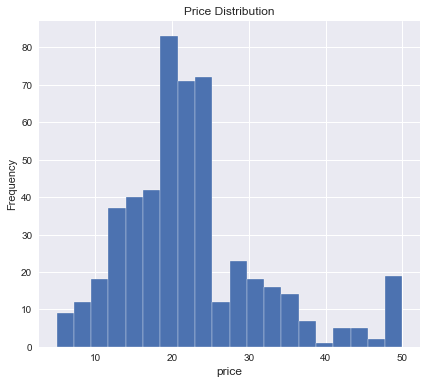

In [4]:
# Plot Price Distribution
plt.subplot(1, 2, 1)
(df.MEDV).plot.hist(bins=20,figsize=(15, 6), edgecolor = 'white')
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

"""
#_________________________________________________TODO______________________________________________
#Plot Log Price Distribution
plt.subplot(1, 2, 2)
(df.LOGMEDV).plot.hist( figsize=(15,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Log Price Distribution', fontsize=12)
"""

plt.show()

## Visualize and Examine 

Are there any linear relationships between some of the IV's and the DV?

Is it:
- Strong? Weak?
- Positive? Negative?
- Linear? Non-Linear?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


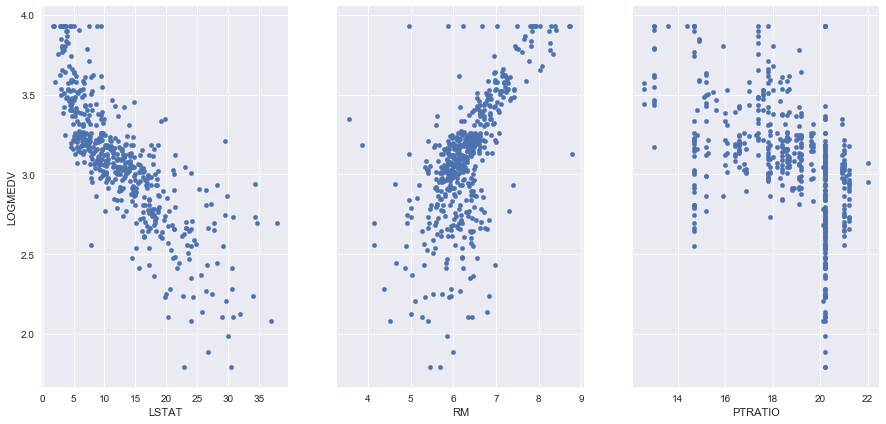

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='LSTAT', y='LOGMEDV', ax=axs[0], figsize=(15, 7))
df.plot(kind='scatter', x='RM', y='LOGMEDV', ax=axs[1])
df.plot(kind='scatter', x='PTRATIO', y='LOGMEDV', ax=axs[2])

# Finding Parameters: B0 and B1
***

The question is: how do we find values for the **intercept** and **slope**?

There are two ways:
1. There is an **analytical solution** - Known as the Normal Equation / OLS
2. There is also a **numerical approximation** method known as Gradient Descent

## Ordinary Least Squares (OLS) Method

<img src='http://i64.tinypic.com/2hdr8t3.png'/>

## 1. Linear Regression Using - OLS Method 

In [6]:
# Create Salary Dataset
yr_x = [2,3,5,13,8,16,11,1,9]
salary_y = [15, 28,42,64, 50,90,58,8,54]
matrix = pd.DataFrame({"yr":yr_x, "salary":salary_y})
matrix['x-x_hat'] = matrix.yr - np.mean(matrix.yr)
matrix['y-y_hat'] = matrix.salary - np.mean(matrix.salary)
matrix['(x-x_hat)(y-y_hat)'] = matrix['x-x_hat']*matrix['y-y_hat']
matrix['(x-x_hat)^2'] = matrix['x-x_hat']*matrix['x-x_hat']

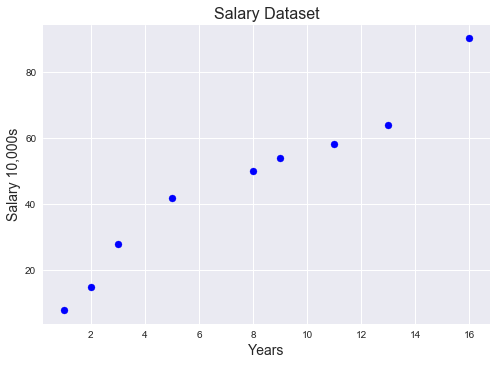

In [7]:
# Plot Salary vs Years
fig, ax = plt.subplots()
ax.scatter(matrix.yr, matrix.salary, c="b")
plt.title("Salary Dataset", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Salary 10,000s", fontsize=14)
plt.show()

In [8]:
# Examine dataset
matrix.head(3)

,salary,yr,x-x_hat,y-y_hat,(x-x_hat)(y-y_hat),(x-x_hat)^2
0,15,2,-5.555556,-30.444444,169.135802,30.864198
1,28,3,-4.555556,-17.444444,79.469136,20.753086
2,42,5,-2.555556,-3.444444,8.802469,6.530864


#### Find the Slope (m)

In [9]:
# Compute the slope m
m = np.sum(matrix['(x-x_hat)(y-y_hat)']) / np.sum(matrix['(x-x_hat)^2'])
print("The Slope m is: " + str(m))

The Slope m is: 4.799588900308324


#### Find the Intercept (b)

In [10]:
b = np.mean(matrix.salary) - (m*np.mean(matrix.yr))
print("The Intercept b is: " + str(b))

The Intercept b is: 9.180883864337105


#### Plot the best fit line

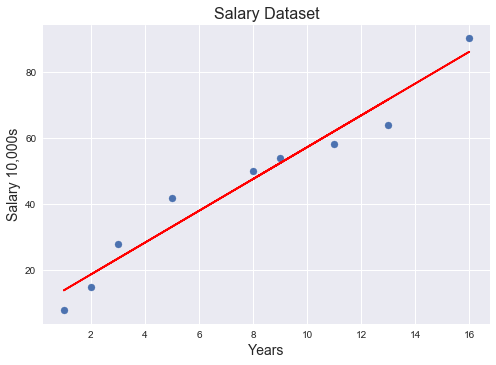

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Some dummy data
x = matrix.yr
y = matrix.salary

# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(x, y, 1)

# Create a list of values in the best fit line
ols_predictions = [m * i + b for i in x]

# Plot the best fit line over the actual values
plt.scatter(x,y)
plt.plot(x, ols_predictions, 'r')
plt.title("Salary Dataset", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Salary 10,000s", fontsize=14)
plt.show()

## Normal Equation Function
<img src='https://cdn-images-1.medium.com/max/1600/1*BIWCTn40qA8Qkgm7yEtgKA.png'/>

## 2. Linear Regression Using - Normal Equation Method 

In [15]:

# Create Normal Equation Function
def NormalEquation(theta,X,y):
    theta=np.linalg.inv(X.T@X)@X.T@y
    return theta

In [16]:
X = np.array([np.ones(len(matrix.yr)), matrix.yr]).T
Y = (matrix.salary[:, np.newaxis])

In [17]:
# Compute B0 and B1
NormalEquation(0,X,Y)

array([[9.18088386],
       [4.7995889 ]])

# Gradient Descent
***

## 3. Linear Regression Using - Gradient Descent

<img src='https://i.stack.imgur.com/O752N.png'>


### Hypothesis Function
***
Hθ(x)=θTx
- x: feature matrix
- θ: model parameters

We have our X Vector already, now let's create our θ parameters:

In [ ]:
# Initial random Theta Values
theta = np.zeros(2)
theta

In [ ]:
# Create X feature matrix (First Column = Intercept values)
X = np.ones(shape=(len(matrix.yr), 2))
X[:, 1] = x
X

In [ ]:
predictions = X @ theta
predictions

<img src='http://i67.tinypic.com/29dhbg3.png'>

### Cost Function

In [ ]:
def cost(theta, X, y):
    predictions = X @ theta
    squared_errors = np.square(predictions - y)
    return np.sum(squared_errors) / (2 * len(y))

In [ ]:
print('The initial cost is:', cost(theta, X, Y))

### Gradient Descent

Perform gradient descent to learn theta

In [ ]:
# Define gradient descent function
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size  # number of training examples
    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
    return theta

### Find Theta Parameters

In [ ]:
# Found the parameters from theta
theta = gradientDescent(X,Y,0,0.008,3000)
theta

### Make predictions 
We now have our Theta Parameters and X Feature:

Hθ(x)=θTx
- x: feature matrix
- θ: model parameters

In [ ]:
gd_predictions = X @ theta   
gd_predictions

In [ ]:
# Plot the regression line
plt.scatter(x,y)
plt.plot(x, gd_predictions, 'g')
plt.title("Salary Dataset", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Salary 10,000s", fontsize=14)
plt.show()

In [ ]:
# Define gradient descent function
def gradientDescent(X, y, theta, alpha, num_iters):
    cost_history = np.zeros(num_iters)  # create a vector to store the cost history
    m = y.size  # number of training examples
    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
        cost_history[i] = cost(theta, X, y) # compute and record the cost
    return theta, cost_history   

### Gradient Descent with Different Learning Rates

Notice how the **smaller the learning rate** takes **more iterations** to minimize the cost function

In [ ]:
num_iters = 3000
learning_rates = [0.000008, 0.000005, 0.00001]
for lr in learning_rates:
    _, cost_history = gradientDescent(X, Y, 0, lr, num_iters)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))

### Large Learning Rate
If you use too **large of a learning rate** then your cost function may **never converge** to a minimum

In [ ]:
learning_rate = 0.025
num_iters = 500
_, cost_history = gradientDescent(X, Y, 0,learning_rate, num_iters)
plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with learning rate = " + str(learning_rate), fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.grid()
plt.show()

### 4. Linear Regression Using - Sklearn

In [ ]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

In [ ]:
# Find the Intercept Parameter (B0)
lr.intercept_

In [ ]:
# Find the Coefficient Parameter (B1)
lr.coef_

# Interpreting OLS Regression Results
***

**Benefits of Statsmodel:** Allows you to get a lot more statistical parameters than SkLearn
### Interpretation

- **Intercept** = 36.4911 This is what the value of our y (dependent variable) would be if the gradient had a value of 0.
- **Coefficient (RM)** = For every unit increase in x, y increases by 3800 dollars.
- **R-Squared (0.741)** =  74.1% of the variation in our y variable is “explained” by the x variable in this model.
- **p-value** The p-value is below 0.05%, denoting statistical significance of the regression at the 5% level.
- **The Null-Hypothesis**:  
    - H(0) says that there is no association between the DV and the IV. 
    - When the p-value is < 0.05 then we can reject the null-hypothesis and say that there is an association between the DV and the IV.
    - When p-value is < 0.05 then there is a relationship between DV and IV

### R Squared

R Squared = Ratio of (Prediction Values / Observed Values)
<img src='http://i64.tinypic.com/8x1p3a.png'>

<div class="alert alert-block alert-success">
<b>TO DO:</b>  
<p>1. Use a **Log Transformed** MEDV for Y and compare the results. Does R Squared improve?</p>
<p>2. Remove the **high p-valued** features: INDUS & AGE</p>

</div>


In [ ]:
import statsmodels.api as sm

# Define X Values
X = sm.add_constant(df.drop(['MEDV','LOGMEDV'],axis=1))

# Define Y 
Y = df.MEDV

# Apply OLS to our X and Y
lm = sm.OLS(Y, X).fit()

# Print Summary of Outputs
lm.summary()

<img src='https://static1.squarespace.com/static/58f7c433bf629a737d4092ee/5aa9f7dc8165f531654c9d28/5ab029df88251bfd94890806/1521494499387/web+p+logo.jpg'>

# Assumptions & How to Check
***

**Source**: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

## L.I.N.E.

- L - Linear Relationship between IV and DV
- I - Independence of residuals
- N - Normality of residuals 
- E - Equal variance of residuals

## Assumptions

1. Linear Relationship between IV and DV
2. There must be no correlation among independent variables. Presence of correlation in independent variables lead to Multicollinearity. If variables are correlated, it becomes extremely difficult for the model to determine the true effect of IVs on DV.
3. The error terms must possess constant variance. Absence of constant variance leads to heteroskedestacity.
4. The error terms must be uncorrelated i.e. error at ∈t must not indicate the at error at ∈t+1. Presence of correlation in error terms is known as Autocorrelation. It drastically affects the regression coefficients and standard error values since they are based on the assumption of uncorrelated error terms.
5. The dependent variable and the error terms must possess a normal distribution.

## 1. Detecting Multicollinearity - VIF

**Note:** Multicollinearity isn't so much of a problem if you're main focus is prediction. 

**Why is this a problem:** 
- When two variables are correlated with each other, then they "move together". 
- This is hard for your linear regression model to interpret the exact change of your DV's. 
- It doesn't know which IV is **responsible** for the change in the DV. 
- βi coefficients will be less precise.
- It's harder to accurately interpret the coefficients 

### Reference
- VIF = 1 (Not correlated)
- 1 < VIF < 5 (Moderately correlated)
- VIF >=5 (Highly correlated)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df.drop(['MEDV','LOGMEDV'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)

### Get Necessary Model Parameters (Refit for Log Transformation)

In [ ]:
# Non-Logged MEDV
#Y = df.MEDV

# Log Transformed MEDV
#Y = df.LOGMEDV

# Apply OLS to our X and Y
lm = sm.OLS(Y, X).fit()

In [ ]:
# fitted values (need a constant term for intercept)
model_fitted_y = lm.fittedvalues

# model residuals
model_residuals = lm.resid

# normalized residuals
model_norm_residuals = lm.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]

## 2. Detecting Heteroskedestacity - Residual Plot

Homescedasticity means the errors exhibit constant variance. **This is a key assumption of linear regression.**

Heteroscedasticity, on the other hand, is what happens when errors show some sort of growth. 
It's not Homescedastic if there is a pattern like: 
- quadratic shaped
- funnel shaped 

<div class="alert alert-block alert-success">
<b>TO DO:</b> 
<p>1. Try refitting the residual plot with the Log Transformed MEDV</p>
</div>


In [ ]:
# Create residual plot of MEDV vs Residuals
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(5)
plot_lm_1.set_figwidth(8)

model_fitted_y = lm.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'MEDV', data=df, 
                          scatter_kws={'alpha': 0.5})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

### Log Transformed MEDV

In [ ]:
"""
#_________________________________________________TODO 1.______________________________________________
# Refit with Log Transformed MEDV and apply the graphs again:

"""

## 3. Detecting Linearity, Normal Distribution of Residuals, & Zero Mean


<div class="alert alert-block alert-success">
<b>TO DO:</b> 
<p>1. Refit with the **Log Transformed Y** and compare the results. Does it look better?</p>
</div>

In [ ]:
import seaborn as sns; sns.set()

# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
#sns.scatterplot(y_test,y_pred_ols,ax=ax,color=['r','g'])
# use the function regplot to make a scatterplot
sns.regplot(x=df.MEDV, y=model_fitted_y, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((df.MEDV - model_fitted_y),ax=ax,color='b')
plt.axvline((df.MEDV - model_fitted_y).mean(),color='k',linestyle='--')
plt.title('Check for Residual normality & mean')
plt.xlabel('Residual eror')
plt.ylabel('$p(x)$');

### Log Transformed MEDV

In [ ]:
"""
#_________________________________________________TODO 1.______________________________________________
# Refit with Log Transformed MEDV and apply the graphs again:

"""

## 4. Detecting Normal Distribution of Residuals - QQ Plot

This plot shows if residuals are normally distributed. Do residuals follow a straight line well or do they deviate severely? It’s good if residuals are lined well on the straight dashed line.

#### Why error terms should be normally distributed? 
For parameter estimate (i.e. estimating the βi’s) we don't need that assumption. But, if it is not a normal distribution, some of those hypotheses tests which we will be doing as part of diagnostics may not be valid. 
For example:  To check whether the Beta (the regression coefficient) is significant or not, I'll do a T-test. So, if my error is not a normal distribution, then the statistic I derive may not be a T-distribution. 

<div class="alert alert-block alert-success">
<b>TO DO:</b> 
<p>1. Refit the OLS with the Log Transformed MEDV and perform the QQ Plot again. Does it look better?</p>
</div>

<img src='http://i63.tinypic.com/2qx8hnb.png'/>

In [ ]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(5)
plot_lm_2.set_figwidth(10)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

### Log Transformed MEDV

In [ ]:
"""
#_________________________________________________TODO 1.______________________________________________
# Refit with Log Transformed MEDV and apply the QQ PLot again:

"""

<img src='https://3.bp.blogspot.com/-jKKePccDp00/Wtx9jR1ZpSI/AAAAAAACrBI/0mkL7mnIQ3kLTGBjf2h9GSzw75IqbFBEwCLcBGAs/s1600/correlation-linear-regression-minitab-output-3-638-640x500.jpg'>

# Modeling
***

Let's perform three types of Linear Regression and compare their performance:
1. Simple Linear Regression
2. Multiple Regression
3. Polynomial Regression

## Simple Linear Regression

In [ ]:
X = df.LSTAT
X = X.reshape((len(X),1))
Y = df.LOGMEDV

In [ ]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [ ]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

In [ ]:
result = pd.DataFrame({'Model':['Simple'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
result

## Multiple Regression

In [ ]:
X = df.drop(['MEDV','LOGMEDV'],axis=1)
Y = df.LOGMEDV

In [ ]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [ ]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

In [ ]:
result_2 = pd.DataFrame({'Model':['Multiple'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
result = result.append(result_2)
result

## Polynomial Regression

Polynomial regression is useful because it allows you to fit a model to **nonlinear trends**.

It creates **new interaction features** in your dataset by:
- Multiplying features together
- Squaring features
- Cubing features
- Etc..

#### Example
You have a matrix [a,b] and want to perform a polynomial regression of degree=2
- new matrix: [1, a, b, a^2, ab, b^2]

In [ ]:
# Original Matrix
np.array(X_train.head(1))

### Import Polynomial Features 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(X_train)
X_testpoly = polyfeat.fit_transform(X_test)
poly = LinearRegression().fit(X_trainpoly, y_train)

predp = poly.predict(X_testpoly)

### Examine Polynomial Features

In [ ]:
# Polynomial Transformation Matrix
X_trainpoly[0]

In [ ]:
r2 = format(r2_score(y_test, predp),'.3f')
mse = format(np.sqrt(mean_squared_error(y_test, predp)),'.3f')
mae = format(mean_absolute_error(y_test, predp),'.3f')

print("R Squared Score: ", format(r2_score(y_test, predp),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predp)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predp),'.3f'))

# Regression Performance Comparison

In [ ]:
result_2 = pd.DataFrame({'Model':['Polynomial'],'R Squared':[r2], 'RMSE':[mse], 'MAE':[mae]})
result = result.append(result_2)
result

# Summary
***

Linear Regression is a powerful, simple, and widely used model. It's great for both predictions and interpretations. Here are some things to keep in mind:

- If all you care about is **prediction**, then correlated features may not be a big deal. 
- If you care about **interpretability** your features must be independent.
- Look at Adjusted R2 when evaluating the performance, it only uses important features for its calculations, whereas R2 will always increase with each addtional new feature.
- Always check the **assumptions** when you are trying to **interpret** the coefficients, OR ELSE your interpretations will be unreliable. 


# Questions
***

1. What Linear Regression training algorithm can you use if you have a training set with millions of features?
2. What is adjusted R2?
3. What are the assumptions of linear regression (simple linear and multiple)?
4. What is meant by dependent and independent variables? (y is dependent, x are independents)
5. What is difference between simple linear and multiple linear regressions?
6. What is difference between regression model, and estimated regression equation?
7. What is a residual? How is it computed? (actual y – estimated y)
8. How do you interpret b1 in simple linear regression?
9. How do you interpret b1 in multiple linear regressions?
10. What happens when p value for t test is lower than alpha i.e. what do you conclude?